## A first neural network in Keras

### General imports

In [212]:
% matplotlib inline
import pickle
import matplotlib.pyplot as plt
import numpy as np
import random as rn
import os

### First step is to load data from file and plot a few examples

In [213]:
train_x = pickle.load(open("MNIST_train_x.pkl", 'rb'))
train_y = pickle.load(open("MNIST_train_y.pkl", 'rb'))
test_x = pickle.load(open("MNIST_test_x.pkl", 'rb'))
test_y = pickle.load(open("MNIST_test_y.pkl", 'rb'))
print(type(train_x))
print(train_x.shape)
print(type(train_y))
print(train_y.shape)
print(type(test_x))
print(test_x.shape)
print(type(test_y))
print(test_y.shape)

# Creating subset of training data to speed up training
train_x_short = train_x[:20000]
train_y_short = train_y[:20000]

<class 'numpy.ndarray'>
(60000, 784)
<class 'numpy.ndarray'>
(60000, 10)
<class 'numpy.ndarray'>
(10000, 784)
<class 'numpy.ndarray'>
(10000, 10)


In [214]:
def plotExamples(data, labels):
    plt.figure(figsize=(8,5))
    for i in range(8):
        sub = 241 + i
        ax = plt.subplot(sub)
        index = np.random.randint(0, data.shape[0])
        ax.set_title("num: " + str(np.argmax(labels[index])))
        im = np.reshape(data[index], (28, 28))
        plt.imshow(im, cmap="gray")
    plt.show()

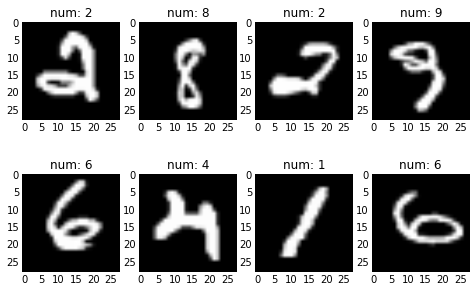

In [215]:
plotExamples(train_x, train_y)

### Building a first Keras model
- Simple 3 layer feedforward network
- Three steps: 
    - Build model
    - Compile model setting the optimizer and loss 
        - Note models can be recompiled without affecting the stored value of weights and biases. This means that if you want to change your learning rate or optimizer during training, you simply recompile and call model.fit again
    - Train the model by calling model.fit

In [216]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

In [217]:
'''
First step is to initialize your model
Keras has two models 
    1. Sequential - easier to work with, suitable for most tasks
    2. Functional AP - useful for defining complex models
'''
model = Sequential()

'''Then, define your model architecture'''

'''
Add a fully connected hidden layer with 128 nodes. 
When you add your first layer, Keras implicitly adds the input layer, 
so you need to specify the dimension of your inputs
'''
model.add(Dense(128, input_dim=784))
'''Specify your activation function for this layer'''
model.add(Activation('sigmoid'))
'''Add an output layer with 10 output nodes'''
model.add(Dense(10))
'''Specify your activation function for this layer'''
model.add(Activation('sigmoid'))

'''
Next, compile your model. This defines two critical features
    1. Optimizer - how your model learns
    2. Loss function - how your model defines the error between
       the correct output and its prediction
Here you can also specify the metrics you want to use to evaluate your model's performance
'''
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

'''
Finally, train your model. 
To train, a model needs input data, and the corresponding correct outputs
You can also specify the batch size and number of training epochs
'''
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=10, verbose=2)

Epoch 1/10
4s - loss: 0.1072 - acc: 0.2179
Epoch 2/10
2s - loss: 0.0782 - acc: 0.4455
Epoch 3/10
2s - loss: 0.0698 - acc: 0.5520
Epoch 4/10
2s - loss: 0.0637 - acc: 0.6160
Epoch 5/10
2s - loss: 0.0590 - acc: 0.6610
Epoch 6/10
3s - loss: 0.0551 - acc: 0.6974
Epoch 7/10
2s - loss: 0.0518 - acc: 0.7255
Epoch 8/10
2s - loss: 0.0490 - acc: 0.7477
Epoch 9/10
2s - loss: 0.0467 - acc: 0.7662
Epoch 10/10
2s - loss: 0.0446 - acc: 0.7833


In [218]:
# Print model information
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_135 (Dense)                (None, 128)           100480      dense_input_53[0][0]             
____________________________________________________________________________________________________
activation_135 (Activation)      (None, 128)           0           dense_135[0][0]                  
____________________________________________________________________________________________________
dense_136 (Dense)                (None, 10)            1290        activation_135[0][0]             
____________________________________________________________________________________________________
activation_136 (Activation)      (None, 10)            0           dense_136[0][0]                  
Total params: 101770
______________________________________________________________________

### Example of recompiling a model
 - This allows you to change the settings of the optimizer and loss function if you wish, without affecting the values of the weights and biases
 - It can be useful for reducing the learning rate if your model performance has plateaued
 - This example also illustrates the validation_split option of the fit function. It holds out a specified proportion of your training data for evaluating model performance as it trains. 
     - This enables you to tune your hyperparameters and model architecture without polluting the test data

In [219]:
model = Sequential()
model.add(Dense(128, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('sigmoid'))

sgd = SGD(lr=0.1)
print("Learning rate is 0.1")
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=10, verbose=2, validation_split=0.2)
print()
sgd = SGD(lr=0.01)
print("Learning rate is 0.01")
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=10, verbose=2, validation_split=0.2)
print()
sgd = SGD(lr=0.001)
print("Learning rate is 0.001")
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=10, verbose=2, validation_split=0.2)

Learning rate is 0.1
Train on 16000 samples, validate on 4000 samples
Epoch 1/10
3s - loss: 0.0690 - acc: 0.5897 - val_loss: 0.0519 - val_acc: 0.7495
Epoch 2/10
2s - loss: 0.0436 - acc: 0.7956 - val_loss: 0.0390 - val_acc: 0.8207
Epoch 3/10
2s - loss: 0.0344 - acc: 0.8478 - val_loss: 0.0324 - val_acc: 0.8595
Epoch 4/10
2s - loss: 0.0292 - acc: 0.8716 - val_loss: 0.0285 - val_acc: 0.8692
Epoch 5/10
1s - loss: 0.0261 - acc: 0.8818 - val_loss: 0.0257 - val_acc: 0.8775
Epoch 6/10
3s - loss: 0.0238 - acc: 0.8910 - val_loss: 0.0238 - val_acc: 0.8850
Epoch 7/10
2s - loss: 0.0221 - acc: 0.8969 - val_loss: 0.0221 - val_acc: 0.8915
Epoch 8/10
2s - loss: 0.0206 - acc: 0.9028 - val_loss: 0.0211 - val_acc: 0.8942
Epoch 9/10
2s - loss: 0.0195 - acc: 0.9067 - val_loss: 0.0201 - val_acc: 0.8988
Epoch 10/10
2s - loss: 0.0186 - acc: 0.9099 - val_loss: 0.0198 - val_acc: 0.9022

Learning rate is 0.01
Train on 16000 samples, validate on 4000 samples
Epoch 1/10
4s - loss: 0.0177 - acc: 0.9163 - val_loss: 0.

### Helper function to calculate model accuracy on the test data

In [220]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    num_correct = np.argmax(result, axis=1)==np.argmax(test_y, axis=1)
    accuracy = np.sum(num_correct) / result.shape[0]
    print("Accuracy on data is: {}%".format(accuracy * 100))

In [221]:
accuracy(test_x, test_y, model)

Accuracy on data is: 90.88000000000001%


### Plotting some examples the model got right and wrong

In [222]:
def get_correct_and_incorrect(model, test_x, test_y):
    result = model.predict(test_x)
    correct_indices = np.argmax(result, axis=1)==np.argmax(test_y, axis=1)
    test_x_correct = test_x[correct_indices]
    test_y_correct = test_y[correct_indices]
    incorrect_indices = np.argmax(result, axis=1)!=np.argmax(test_y, axis=1)
    test_x_incorrect = test_x[incorrect_indices]
    test_y_incorrect = test_y[incorrect_indices]
    return test_x_correct, test_y_correct, test_x_incorrect, test_y_incorrect

In [223]:
test_x_correct, test_y_correct, test_x_incorrect, test_y_incorrect = get_correct_and_incorrect(model, test_x, test_y)

(9088, 784)


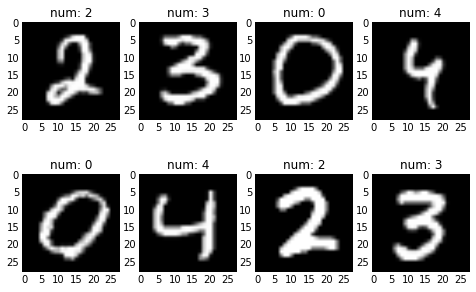

In [224]:
print(test_x_correct.shape)
plotExamples(test_x_correct, test_y_correct)

(912, 784)


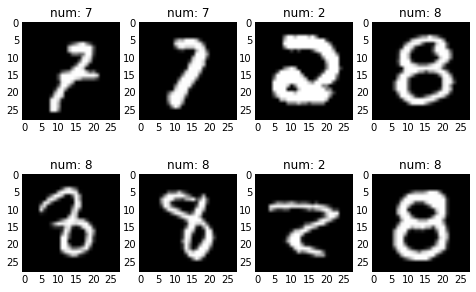

In [225]:
print(test_x_incorrect.shape)
plotExamples(test_x_incorrect, test_y_incorrect)

### Quadratic cost (mean squared error) vs. categorical crossentropy loss functions
- Categorical cross-entropy significantly speeds up training
- Softmax output layers are the most appropriate for the MNIST problem since each image can only belong to one class and softmax outputs a proability distribution across the 10 classes.
    - As the value of one output node increases, the value of one or more other output nodes must decrease
    - This is consistent with our intuition that as we become more confident and image belongs to one class, we reduce our confidence that an image belongs to other classes

In [226]:
# Softmax output layer, mse
model = Sequential()
model.add(Dense(128, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=10, validation_split=0.2, verbose=2)
print()

# Softmax output layer, categorical crossentropy
model = Sequential()
model.add(Dense(128, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=10, validation_split=0.2, verbose=2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
3s - loss: 0.0906 - acc: 0.1664 - val_loss: 0.0862 - val_acc: 0.2437
Epoch 2/10
2s - loss: 0.0804 - acc: 0.3519 - val_loss: 0.0762 - val_acc: 0.4183
Epoch 3/10
2s - loss: 0.0708 - acc: 0.4928 - val_loss: 0.0680 - val_acc: 0.5058
Epoch 4/10
2s - loss: 0.0630 - acc: 0.5716 - val_loss: 0.0616 - val_acc: 0.5777
Epoch 5/10
2s - loss: 0.0572 - acc: 0.6232 - val_loss: 0.0567 - val_acc: 0.6202
Epoch 6/10
2s - loss: 0.0526 - acc: 0.6629 - val_loss: 0.0527 - val_acc: 0.6550
Epoch 7/10
2s - loss: 0.0490 - acc: 0.6883 - val_loss: 0.0495 - val_acc: 0.6793
Epoch 8/10
2s - loss: 0.0459 - acc: 0.7108 - val_loss: 0.0466 - val_acc: 0.7045
Epoch 9/10
2s - loss: 0.0433 - acc: 0.7313 - val_loss: 0.0443 - val_acc: 0.7225
Epoch 10/10
2s - loss: 0.0411 - acc: 0.7479 - val_loss: 0.0421 - val_acc: 0.7408

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
4s - loss: 1.0721 - acc: 0.7261 - val_loss: 0.6941 - val_acc: 0.8343
Epoch 2/10
2s - loss

## ReLU vs. Sigmoid

## ReLU observations
- Needs a low learning rate for the network to learn anything
- Performs worse than a sigmoid hidden layer for shallow networks

In [227]:
# Relu hidden layer, 3 layer network
model = Sequential()
model.add(Dense(128, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = SGD(lr=0.001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=10, validation_split=0.2, verbose=2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
4s - loss: 9.9692 - acc: 0.3785 - val_loss: 8.3755 - val_acc: 0.4793
Epoch 2/10
3s - loss: 8.3695 - acc: 0.4792 - val_loss: 8.3644 - val_acc: 0.4798
Epoch 3/10
3s - loss: 8.2240 - acc: 0.4887 - val_loss: 8.3044 - val_acc: 0.4830
Epoch 4/10
2s - loss: 8.2053 - acc: 0.4904 - val_loss: 8.2587 - val_acc: 0.4858
Epoch 5/10
2s - loss: 8.1733 - acc: 0.4923 - val_loss: 8.0840 - val_acc: 0.4968
Epoch 6/10
2s - loss: 8.0964 - acc: 0.4966 - val_loss: 8.1047 - val_acc: 0.4960
Epoch 7/10
2s - loss: 8.0953 - acc: 0.4973 - val_loss: 8.0614 - val_acc: 0.4990
Epoch 8/10
2s - loss: 8.0587 - acc: 0.4992 - val_loss: 8.0448 - val_acc: 0.5005
Epoch 9/10
2s - loss: 8.0787 - acc: 0.4983 - val_loss: 8.0404 - val_acc: 0.4998
Epoch 10/10
3s - loss: 8.0648 - acc: 0.4993 - val_loss: 8.0301 - val_acc: 0.5015


In [228]:
# Sigmoid hidden layer, 3 layer network
model = Sequential()
model.add(Dense(128, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=10, validation_split=0.2, verbose=2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
4s - loss: 1.1239 - acc: 0.7109 - val_loss: 0.7002 - val_acc: 0.8373
Epoch 2/10
2s - loss: 0.5807 - acc: 0.8612 - val_loss: 0.5433 - val_acc: 0.8668
Epoch 3/10
2s - loss: 0.4565 - acc: 0.8872 - val_loss: 0.4331 - val_acc: 0.8945
Epoch 4/10
2s - loss: 0.3962 - acc: 0.9013 - val_loss: 0.3978 - val_acc: 0.8972
Epoch 5/10
2s - loss: 0.3583 - acc: 0.9085 - val_loss: 0.3667 - val_acc: 0.8995
Epoch 6/10
2s - loss: 0.3378 - acc: 0.9118 - val_loss: 0.3437 - val_acc: 0.9100
Epoch 7/10
2s - loss: 0.3154 - acc: 0.9157 - val_loss: 0.3351 - val_acc: 0.9117
Epoch 8/10
2s - loss: 0.3013 - acc: 0.9217 - val_loss: 0.3194 - val_acc: 0.9097
Epoch 9/10
2s - loss: 0.2839 - acc: 0.9231 - val_loss: 0.3060 - val_acc: 0.9167
Epoch 10/10
2s - loss: 0.2765 - acc: 0.9263 - val_loss: 0.3075 - val_acc: 0.9160


### Relu really comes into its own for deep networks
- Deeper network tend to perform better than shallow networks for complex tasks
- But they are hard to train. Relu's make it easier for deep networks to learn because their gradients don't saturate for postive inputs

In [229]:
# Relu hidden layer, 6 layer network
model = Sequential()
model.add(Dense(512, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = SGD(lr=0.001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=10, validation_split=0.2, verbose=2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
7s - loss: 7.7711 - acc: 0.4991 - val_loss: 6.9307 - val_acc: 0.5550
Epoch 2/10
6s - loss: 4.5370 - acc: 0.6824 - val_loss: 2.5693 - val_acc: 0.8037
Epoch 3/10
6s - loss: 2.4312 - acc: 0.8145 - val_loss: 2.2786 - val_acc: 0.8107
Epoch 4/10
6s - loss: 0.7777 - acc: 0.9097 - val_loss: 0.5267 - val_acc: 0.9185
Epoch 5/10
6s - loss: 0.3073 - acc: 0.9478 - val_loss: 0.4283 - val_acc: 0.9205
Epoch 6/10
5s - loss: 0.1869 - acc: 0.9650 - val_loss: 0.3552 - val_acc: 0.9287
Epoch 7/10
6s - loss: 0.1072 - acc: 0.9791 - val_loss: 0.3549 - val_acc: 0.9313
Epoch 8/10
6s - loss: 0.0717 - acc: 0.9881 - val_loss: 0.3532 - val_acc: 0.9335
Epoch 9/10
6s - loss: 0.0546 - acc: 0.9943 - val_loss: 0.3676 - val_acc: 0.9315
Epoch 10/10
6s - loss: 0.0471 - acc: 0.9965 - val_loss: 0.3488 - val_acc: 0.9345


In [230]:
# Sigmoid hidden layer, 6 layer network
model = Sequential()
model.add(Dense(512, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(256))
model.add(Activation('sigmoid'))
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dense(64))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=10, validation_split=0.2, verbose=2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
8s - loss: 2.3114 - acc: 0.1153 - val_loss: 2.2934 - val_acc: 0.1182
Epoch 2/10
6s - loss: 2.2872 - acc: 0.1465 - val_loss: 2.2806 - val_acc: 0.1945
Epoch 3/10
6s - loss: 2.2730 - acc: 0.1824 - val_loss: 2.2641 - val_acc: 0.2225
Epoch 4/10
6s - loss: 2.2533 - acc: 0.2381 - val_loss: 2.2409 - val_acc: 0.2732
Epoch 5/10
6s - loss: 2.2222 - acc: 0.2976 - val_loss: 2.2014 - val_acc: 0.3635
Epoch 6/10
7s - loss: 2.1706 - acc: 0.3659 - val_loss: 2.1340 - val_acc: 0.3842
Epoch 7/10
6s - loss: 2.0786 - acc: 0.4174 - val_loss: 2.0153 - val_acc: 0.4492
Epoch 8/10
5s - loss: 1.9350 - acc: 0.4814 - val_loss: 1.8502 - val_acc: 0.4853
Epoch 9/10
5s - loss: 1.7513 - acc: 0.5333 - val_loss: 1.6554 - val_acc: 0.5883
Epoch 10/10
6s - loss: 1.5409 - acc: 0.6124 - val_loss: 1.4397 - val_acc: 0.6460


### Putting everything together and training on all the data

In [231]:
# Relu hidden layer, 6 layer network
model = Sequential()
model.add(Dense(1024, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

sgd = SGD(lr=0.001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=32, nb_epoch=15, validation_split=0.2, verbose=2)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_157 (Dense)                (None, 1024)          803840      dense_input_61[0][0]             
____________________________________________________________________________________________________
activation_157 (Activation)      (None, 1024)          0           dense_157[0][0]                  
____________________________________________________________________________________________________
dense_158 (Dense)                (None, 512)           524800      activation_157[0][0]             
____________________________________________________________________________________________________
activation_158 (Activation)      (None, 512)           0           dense_158[0][0]                  
___________________________________________________________________________________________

In [232]:
accuracy(test_x, test_y, model)

Accuracy on data is: 96.5%


In [233]:
test_x_correct, test_y_correct, test_x_incorrect, test_y_incorrect = get_correct_and_incorrect(model, test_x, test_y)

(9650, 784)


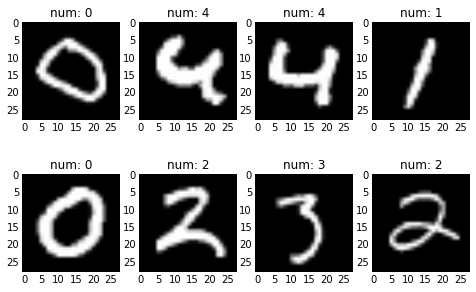

In [234]:
print(test_x_correct.shape)
plotExamples(test_x_correct, test_y_correct)

(350, 784)


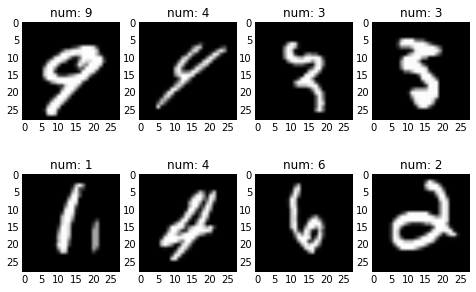

In [235]:
print(test_x_incorrect.shape)
plotExamples(test_x_incorrect, test_y_incorrect)